# Perokok di Indonesia Berdasarkan Dataset IFLS 5

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcairo

plt.style.use("ggplot") 

In [231]:
df0 = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b3b_km.dta")
df0 = df0[["hhid14_9", "km08", "km09"]]
df0.set_index("hhid14_9", inplace = True)
df0.dropna(inplace = True)
df0.rename(columns = {"km08":"Batang Rokok","km09":"Pengeluaran"}, inplace = True)

In [232]:
df0.replace(0, np.nan, inplace = True)
df0.dropna(inplace = True)

Text(0.5, 1.0, 'Pengeluaran Rokok Perokok dalam Seminggu')

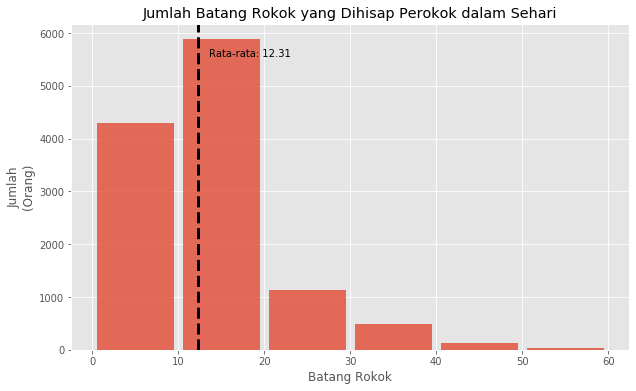

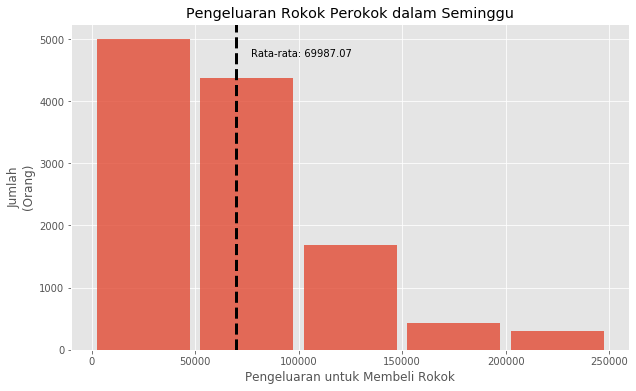

In [233]:
plt.figure(0, figsize=[10, 6])

plt.hist(df0["Batang Rokok"], rwidth = 0.9, bins = [0, 10, 20, 30, 40, 50, 60], alpha = 0.8)

min_ylim, max_ylim = plt.ylim()
plt.axvline(df0["Batang Rokok"].mean(), color='k', linestyle='dashed', linewidth=3)
plt.text(df0["Batang Rokok"].mean()*1.1, max_ylim*0.9, 'Rata-rata: {:.2f}'.format(df0["Batang Rokok"].mean()))

plt.xlabel("Batang Rokok")
plt.ylabel("Jumlah\n(Orang)")
plt.title("Jumlah Batang Rokok yang Dihisap Perokok dalam Sehari")

plt.figure(1, figsize=[10, 6])

plt.hist(df0["Pengeluaran"], rwidth = 0.9, bins = [0, 50000, 100000, 150000, 200000, 250000], alpha = 0.8)

min_ylim, max_ylim = plt.ylim()
plt.axvline(df0["Pengeluaran"].mean(), color='k', linestyle='dashed', linewidth=3)
plt.text(df0["Pengeluaran"].mean()*1.1, max_ylim*0.9, 'Rata-rata: {:.2f}'.format(df0["Pengeluaran"].mean()))

plt.xlabel("Pengeluaran untuk Membeli Rokok")
plt.ylabel("Jumlah\n(Orang)")
plt.title("Pengeluaran Rokok Perokok dalam Seminggu")

In [234]:
df1 = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b3b_km.dta")
df1 = df1[["hhid14_9", "km10", "km05aa"]]
df1.set_index("hhid14_9", inplace = True)
df1.dropna(inplace = True)
df1.rename(columns = {"km10":"Mulai Merokok","km05aa":"Berhenti Merokok"}, inplace = True)
df1.replace(0.0, np.nan, inplace = True)
df1.dropna(inplace = True)

Text(0, 0.5, 'Jumlah')

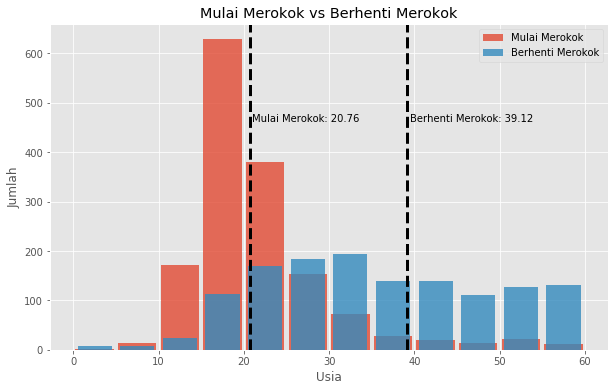

In [235]:
plt.figure(figsize=[10, 6])

plt.hist(df1["Mulai Merokok"], label = "Mulai Merokok", alpha = 0.8, bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],  rwidth = 0.9)
plt.hist(df1["Berhenti Merokok"], label = "Berhenti Merokok", alpha = 0.8, bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],  rwidth = 0.8)


min_ylim, max_ylim = plt.ylim()
plt.axvline(df1["Mulai Merokok"].mean(), color='k', linestyle='dashed', linewidth=3)
plt.text(df1["Mulai Merokok"].mean()*1.01, max_ylim*0.7, 'Mulai Merokok: {:.2f}'.format(df1["Mulai Merokok"].mean()))

plt.axvline(df1["Berhenti Merokok"].mean(), color='k', linestyle='dashed', linewidth=3)
plt.text(df1["Berhenti Merokok"].mean()*1.01, max_ylim*0.7, 'Berhenti Merokok: {:.2f}'.format(df1["Berhenti Merokok"].mean()))

plt.legend()
plt.title("Mulai Merokok vs Berhenti Merokok")
plt.xlabel("Usia")
plt.ylabel("Jumlah")

In [236]:
df2 = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b3a_dl1.dta")
df2 = df2[["hhid14_9", "dl06"]]
df2.set_index("hhid14_9", inplace = True)
df2.dropna(inplace = True)
df2.rename(columns = {"dl06":"Pendidikan"}, inplace = True)

print(df2["Pendidikan"].unique())

[2:Elementary school, 3:Junior high general, 61:University S1, 60:College (D1,D2,D3), 6:Senior high vocational, ..., 63:University S3, 11:Adult education A, 14:Islamic School (pesantren), 99:MISSING, 90:Kindergarten]
Length: 22
Categories (22, object): [2:Elementary school < 3:Junior high general < 4:Junior high vocational < 5:Senior high general ... 90:Kindergarten < 95:Other < 98:Don't Know < 99:MISSING]


In [237]:
df2.replace("90:Kindergarten", "TK", inplace = True)
df2.replace("72:Islamic Elementary School (Madrasah Ibtidaiyah)", "SD/Sederajat", inplace = True)
df2.replace("2:Elementary school", "SD/Sederajat", inplace = True)
df2.replace("11:Adult education A", "SD/Sederajat", inplace = True)
df2.replace("12:Adult education B", "SLTP/Sederajat", inplace = True)
df2.replace("3:Junior high general", "SLTP/Sederajat", inplace = True)
df2.replace("14:Islamic School (pesantren)", "SLTP/Sederajat", inplace = True)
df2.replace("4:Junior high vocational", "SLTP/Sederajat", inplace = True)
df2.replace("74:Islamic Senior/High School (Madrasah Tsanawiyah)", "SMA/Sederajat", inplace = True)
df2.replace("5:Senior high general", "SMA/Sederajat", inplace = True)
df2.replace("6:Senior high vocational", "SMA/Sederajat", inplace = True)
df2.replace("15:Adult education C", "SMA/Sederajat", inplace = True)
df2.replace("60:College (D1,D2,D3)", "D1/D2/D3", inplace = True)
df2.replace("63:University S3", "S3", inplace = True)
df2.replace("62:University S2", "S2", inplace = True)
df2.replace("13:Open university", "S1", inplace = True)
df2.replace("99:MISSING", np.nan, inplace = True)
df2.replace("98:Don't Know", np.nan, inplace = True)
df2.replace("61:University S1", "S1", inplace = True)
df2.replace("73:Islamic Junior/High School (Madrasah Tsanawiyah)", "SLTP/Sederajat", inplace = True)
df2.replace("95:Other", np.nan, inplace = True)
df2.replace("17:School for Disabled", "SD/Sederajat", inplace = True)
df2.replace("SLTP/Sederajat", "SMP/Sederajat", inplace = True)

df2.dropna(inplace =True)

In [238]:
#menghilangkan index yang dobel
df2_index = df2.index
is_duplicate = df2_index.duplicated(keep="first")
not_duplicate = ~is_duplicate
df2 = df2[not_duplicate]

In [239]:
df3 = df0.merge(df2, on="hhid14_9")
#menghilangkan index yang dobel
df3_index = df3.index
is_duplicate = df3_index.duplicated(keep="first")
not_duplicate = ~is_duplicate
df3 = df3[not_duplicate]


df3_berat1 = df3_berat.groupby(["Pendidikan"]).size()
df3_berat1 = pd.DataFrame(df3_berat1)
df3_berat1.rename(columns = {0: "Jumlah"}, inplace = True)
df3_berat1.replace(0, np.nan, inplace = True)
df3_berat1.dropna(inplace = True)
df3_berat1.reset_index(inplace = True)
df3_berat1.drop(index = 4, inplace = True)
df3_berat1

,Pendidikan,Jumlah
0,SMP/Sederajat,1224.0
1,S1,373.0
2,D1/D2/D3,165.0
3,S2,18.0
5,SD/Sederajat,2252.0
6,SMA/Sederajat,1667.0


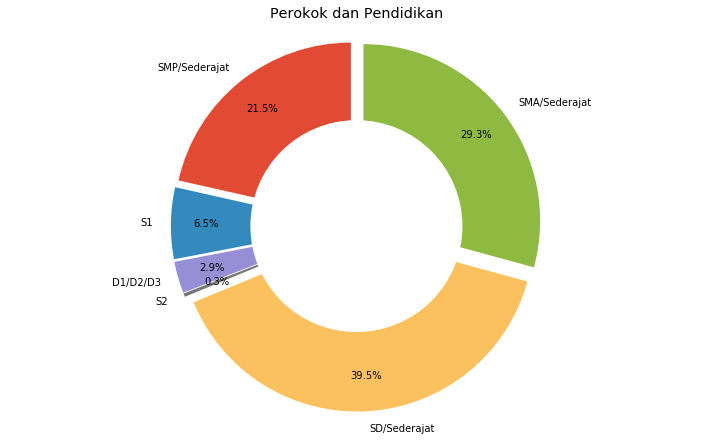

In [248]:
plt.figure(figsize = (10, 6))
# Pie chart
labels = df3_berat1["Pendidikan"]
sizes = df3_berat1["Jumlah"]
#explsion
explode = (0.05, 0.05 , 0.05, 0.05, 0.05, 0.05)
 
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, pctdistance=0.8, 
        explode = explode,
        labeldistance=1.1,
        textprops={'color':"k"})

#draw circle
centre_circle = plt.Circle((0,0),0.6,fc='w')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title("Perokok dan Pendidikan")

plt.show()

In [241]:
df4 = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b3a_sw.dta")
df4 = df4[["hhid14_9", "sw12"]]
df4.set_index("hhid14_9", inplace = True)
df4.dropna(inplace = True)
df4["sw12"].unique()

[2:Happy, 3:Unhappy, 1:Very happy, 4:Very Unhappy]
Categories (4, object): [1:Very happy < 2:Happy < 3:Unhappy < 4:Very Unhappy]

In [242]:
df5 = df0.merge(df4, on = "hhid14_9")
df5

,Batang Rokok,Pengeluaran,sw12
hhid14_9,,,
001060000,12.0,35000.0,2:Happy
001060000,12.0,35000.0,3:Unhappy
001060000,12.0,35000.0,2:Happy
001080003,12.0,42000.0,2:Happy
001080003,12.0,42000.0,2:Happy
...,...,...,...
321290000,12.0,112000.0,2:Happy
321290000,7.0,118000.0,2:Happy
321290000,7.0,118000.0,2:Happy


In [243]:
df6 = df5.groupby("sw12").size()
df6 = pd.DataFrame(df6)
df6.rename(columns = {0:"Jumlah"}, inplace = True)
df6.reset_index(inplace=True)

In [244]:
#menemukan hhid keluarga tanpa anggota perokok
df7 = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b3b_km.dta")
df7 = df7[df7["km01a"] == "3:No"]
df7 = df7[["hhid14_9"]]
df7.drop_duplicates(inplace = True)
df7

,hhid14_9
1,001060004
2,001060000
6,001080000
7,001080003
13,001220009
...,...
34254,321280005
34256,321280009
34259,321290000
34266,321291100


In [245]:
df8 = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b3a_sw.dta")
df8 = df8[["hhid14_9", "sw12"]]

df9 = df8.merge(df7, on = "hhid14_9")
df9.drop_duplicates(inplace = True)

In [246]:
df10 = df9.groupby("sw12").size()
df10 = pd.DataFrame(df10)
df10.rename(columns = {0:"Jumlah"}, inplace = True)
df10.reset_index(inplace = True)
df10

,sw12,Jumlah
0,1:Very happy,3394
1,2:Happy,12303
2,3:Unhappy,1815
3,4:Very Unhappy,292


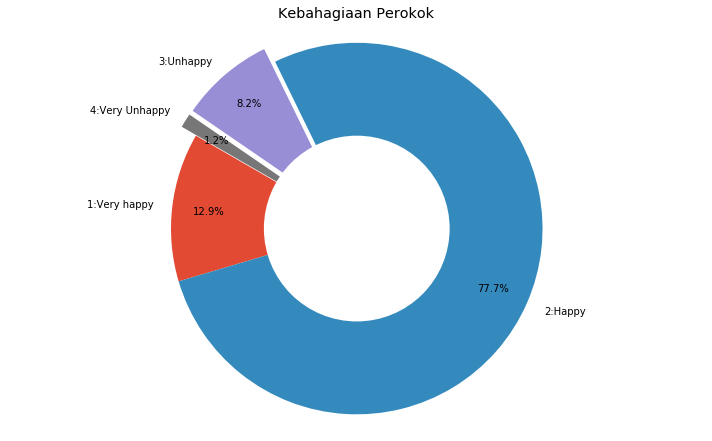

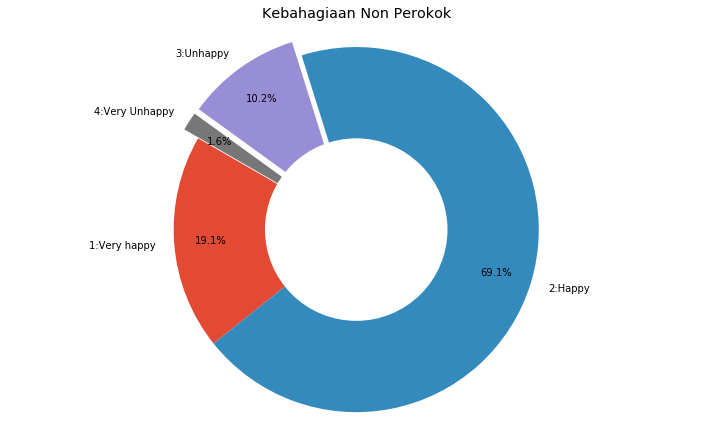

In [247]:
plt.figure(0, figsize = (10, 6))
# Pie chart
labels = df6["sw12"]
sizes = df6["Jumlah"]

plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=150, 
        pctdistance=0.8, 
        labeldistance=1.1,
        explode = [0, 0, 0.09, 0.09],
        textprops={'color':"k"})
#draw circle
centre_circle = plt.Circle((0,0),0.5,fc='w')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title("Kebahagiaan Perokok")

plt.show()


plt.figure(1, figsize = (10, 6))
# Pie chart
labels = df10["sw12"]
sizes = df10["Jumlah"]

plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=150, 
        pctdistance=0.8, 
        labeldistance=1.1,
        explode = [0, 0, 0.09, 0.09],
        textprops={'color':"k"})
#draw circle
centre_circle = plt.Circle((0,0),0.5,fc='w')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title("Kebahagiaan Non Perokok")

plt.show()